In [37]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [38]:
df = pd.read_csv(r"E:\MLOps-Vehicle-Insurance-Claim-Prediction\vehicle_data\insurance_data.csv")
df.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,speeding_violations,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1,after 2015,0,1,10238,12000.0,0,0,0
1,750365,0,1,0-9y,none,poverty,0.357757,0,before 2015,0,0,10238,16000.0,0,0,1
2,199901,0,0,0-9y,high school,working class,0.493146,1,before 2015,0,0,10238,11000.0,0,0,0
3,478866,0,1,0-9y,university,working class,0.206013,1,before 2015,0,1,32765,11000.0,0,0,0
4,731664,1,1,10-19y,none,working class,0.388366,1,before 2015,0,0,32765,12000.0,2,1,1


In [39]:
"""
Client's gender:
0: Female
1: Male
"""
df["gender"].value_counts()

gender
0    5010
1    4990
Name: count, dtype: int64

In [40]:
"""
Client's Age Group
0: 16-25
1: 26-39
2: 40-64
3: 65+
"""
df["age"].value_counts()

age
1    3063
2    2931
0    2016
3    1990
Name: count, dtype: int64

In [41]:
"""
Years the client has been driving:
0: 0-9
1: 10-19
2: 20-29
3: 30+
"""
df["driving_experience"].value_counts()


driving_experience
0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: count, dtype: int64

In [42]:
"""
Client's level of education:
0: No education
1: High school
2: University
"""
df["education"].value_counts()


education
high school    4157
university     3928
none           1915
Name: count, dtype: int64

In [43]:
"""
	Client's income level:
0: Poverty
1: Working class
2: Middle class
3: Upper class
"""
df["income"].value_counts()


income
upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: count, dtype: int64

In [44]:
"""
Client's credit score (between zero and one)
"""
df["credit_score"].unique()


array([0.62902731, 0.35775712, 0.49314579, ..., 0.47094023, 0.36418479,
       0.43522478], shape=(9019,))

In [45]:
"""Client's vehicle ownership status:
0: Does not own their vehilce (paying off finance)
1: Owns their vehicle
"""
df["vehicle_ownership"].value_counts()

vehicle_ownership
1    6970
0    3030
Name: count, dtype: int64

In [46]:
"""	Year of vehicle registration:
0: Before 2015
1: 2015 or later
"""
df["vehicle_year"].value_counts()


vehicle_year
before 2015    6967
after 2015     3033
Name: count, dtype: int64

In [47]:
"""Client's marital status:
0: Not married
1: Married
"""
df["married"].value_counts()


married
0    5018
1    4982
Name: count, dtype: int64

In [48]:
"""Client's have children"""
df["children"].value_counts()


children
1    6888
0    3112
Name: count, dtype: int64

In [49]:
"""Number of miles driven by the client each year"""
df["annual_mileage"].value_counts()


annual_mileage
11000.0    1253
12000.0    1218
13000.0    1137
10000.0    1071
14000.0     894
9000.0      856
15000.0     632
8000.0      557
16000.0     419
7000.0      322
17000.0     246
6000.0      165
18000.0     103
5000.0       65
19000.0      48
4000.0       27
20000.0      13
3000.0       10
21000.0       3
2000.0        2
22000.0       2
Name: count, dtype: int64

In [50]:
"""Total number of speeding violations received by the client"""
df["speeding_violations"].value_counts()


speeding_violations
0     5028
1     1544
2     1161
3      830
4      530
5      319
6      188
7      140
8       75
10      50
9       49
11      30
12      20
13      12
15       8
14       5
16       4
17       3
19       2
18       1
22       1
Name: count, dtype: int64

In [51]:
"""Total number of previous accidents the client has been involved in"""
df["past_accidents"].value_counts()



past_accidents
0     5584
1     1783
2     1104
3      646
4      366
5      232
6      144
7       61
8       41
9       19
10       9
11       7
12       2
14       1
15       1
Name: count, dtype: int64

In [52]:
"""Whether the client made a claim on their car insurance (response variable):
0: No claim
1: Made a claim
"""
df["outcome"].value_counts()


outcome
0    6867
1    3133
Name: count, dtype: int64

In [53]:
# # Outlier Detection
# from scipy.stats import zscore

# z_scores = df.select_dtypes(include=["int64", "float64"]).apply(zscore)

# threshold = 3

# outliers = (np.abs(z_scores) > threshold)
# outlier_values = df[outliers]

# print("Outlier counts in each column:")
# print(outliers.sum())

# df_with_outlier_rows = df[outliers.any(axis=1)]

In [54]:
from analysis.data_inspection import (DataInspector,
                        DataTypesInspectionStrategy,
                        SummaryStatisticsInspectionStrategy,
                        DuplicateRowsInspectionStrategy,
                        OutlierDetectionStrategy,
                        UniqueValuesInspectionStrategy)

inspector = DataInspector(DataTypesInspectionStrategy())
inspector.execute_inspection(df)


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  int64  
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  int64  
 10  children             10000 non-null  int64  
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  speeding_violations  10000 non-null  int64  
 14  past_accidents       10000 non-null  int64  
 15  outc

In [55]:
inspector = DataInspector(SummaryStatisticsInspectionStrategy())
inspector.execute_inspection(df)


Summary Statistics Numerical Features:
                  id           age        gender  credit_score  \
count   10000.000000  10000.000000  10000.000000   9018.000000   
mean   500521.906800      1.489500      0.499000      0.515813   
std    290030.768758      1.025278      0.500024      0.137688   
min       101.000000      0.000000      0.000000      0.053358   
25%    249638.500000      1.000000      0.000000      0.417191   
50%    501777.000000      1.000000      0.000000      0.525033   
75%    753974.500000      2.000000      1.000000      0.618312   
max    999976.000000      3.000000      1.000000      0.960819   

       vehicle_ownership       married      children   postal_code  \
count       10000.000000  10000.000000  10000.000000  10000.000000   
mean            0.697000      0.498200      0.688800  19864.548400   
std             0.459578      0.500022      0.463008  18915.613855   
min             0.000000      0.000000      0.000000  10238.000000   
25%            

In [56]:
inspector = DataInspector(DuplicateRowsInspectionStrategy())
inspector.execute_inspection(df)


Number of Duplicate Rows: 0


In [57]:
inspector = DataInspector(OutlierDetectionStrategy())
inspector.execute_inspection(df)


Outlier Detection (Using IQR Method):
id: 0 outliers
age: 0 outliers
gender: 0 outliers
credit_score: 9 outliers
vehicle_ownership: 0 outliers
married: 0 outliers
children: 0 outliers


postal_code: 484 outliers
annual_mileage: 17 outliers
speeding_violations: 588 outliers
past_accidents: 285 outliers
outcome: 0 outliers


In [58]:
inspector = DataInspector(UniqueValuesInspectionStrategy())
inspector.execute_inspection(df)


Unique Values Count (Categorical Features):
driving_experience: 4 unique values
education: 3 unique values
income: 4 unique values
vehicle_year: 2 unique values



Missing Values Count by Column:
credit_score      982
annual_mileage    957
dtype: int64

Visualizing Missing Values...


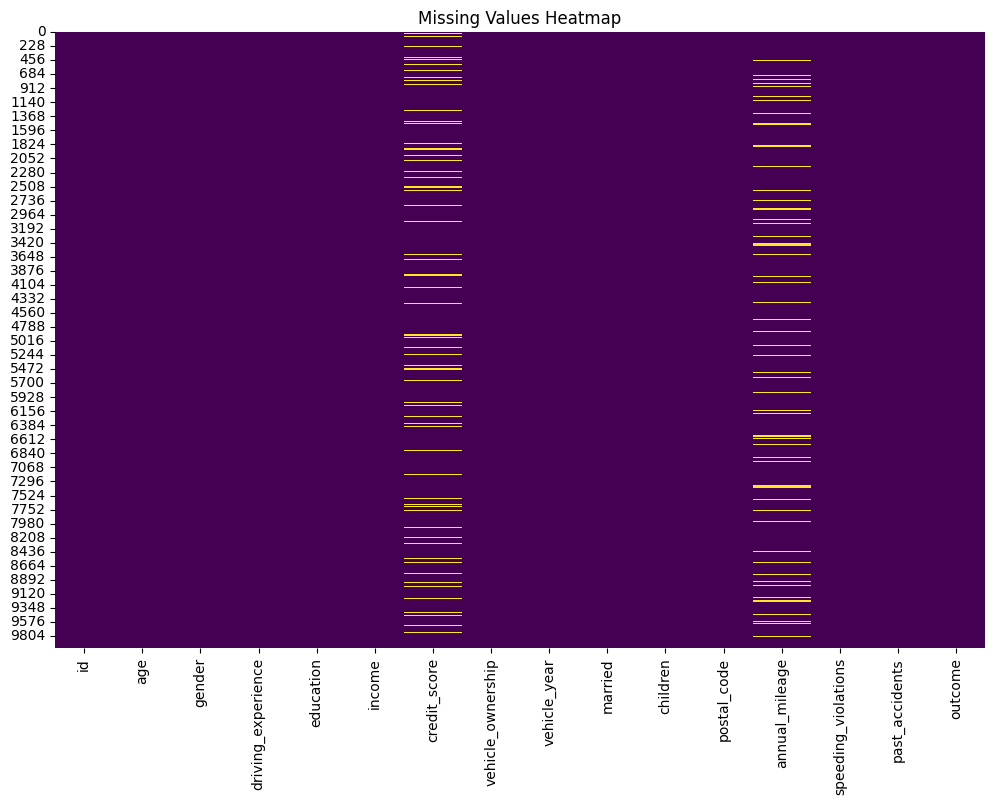

In [59]:
from analysis.missing_value_analysis import (MissingValuesAnalysisTemplate,
                                              SimpleMissingValuesAnalysis)

missing_values_analyzer = SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(df)

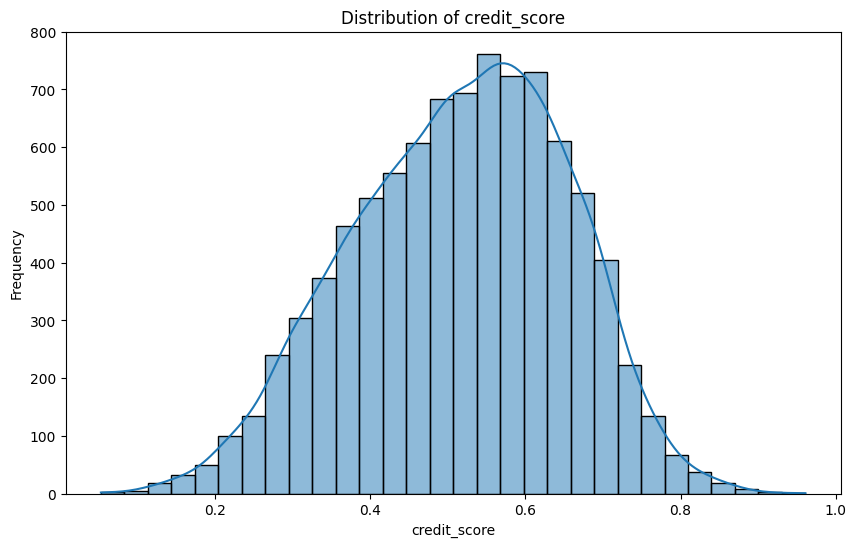

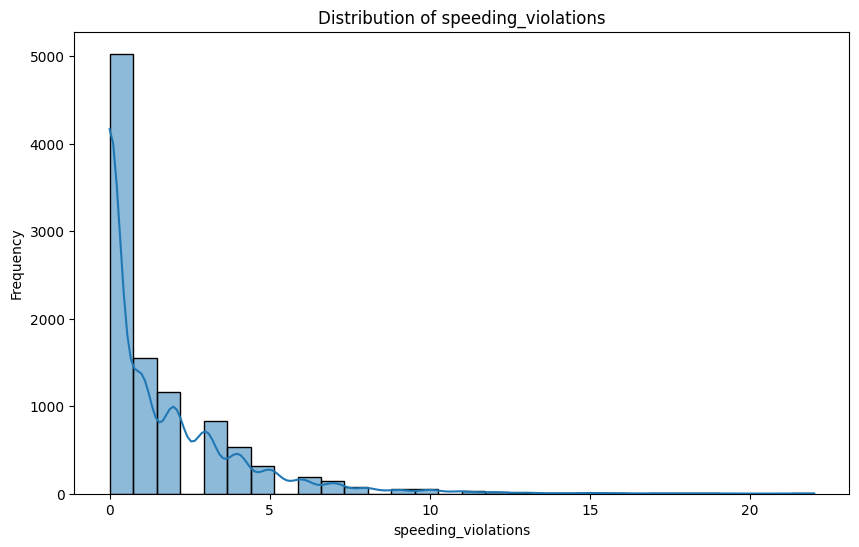

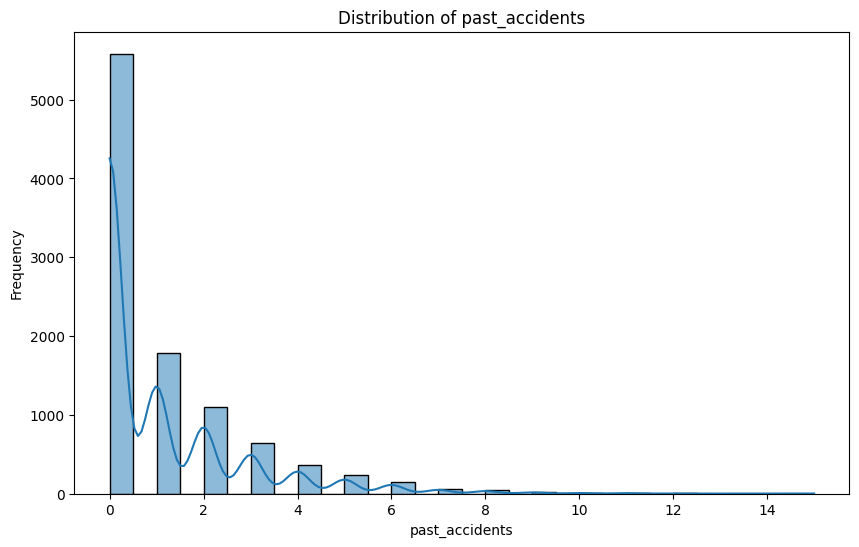

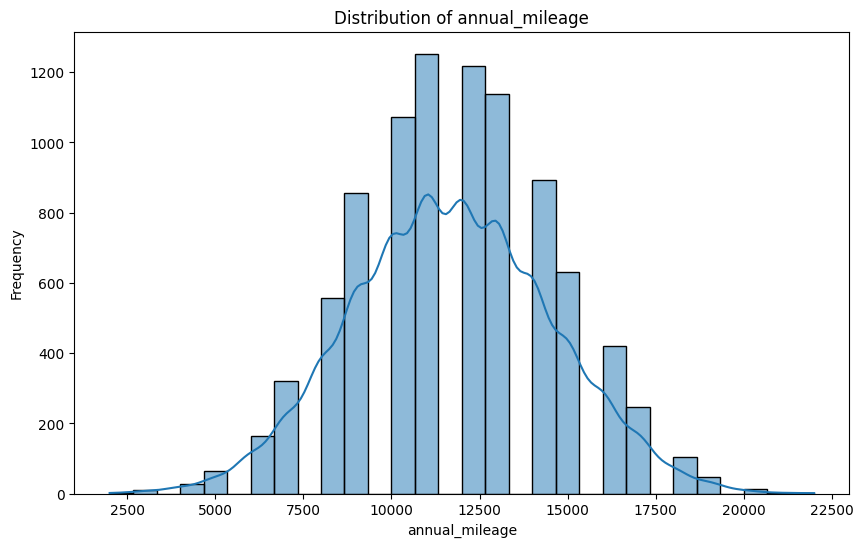

In [60]:
from analysis.univariate_analysis import UnivariateAnalyzer, NumericalUnivariateAnalysis, CategoricalUnivariateAnalysis

univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'credit_score')
univariate_analyzer.execute_analysis(df, 'speeding_violations')
univariate_analyzer.execute_analysis(df, 'past_accidents')
univariate_analyzer.execute_analysis(df, 'annual_mileage')



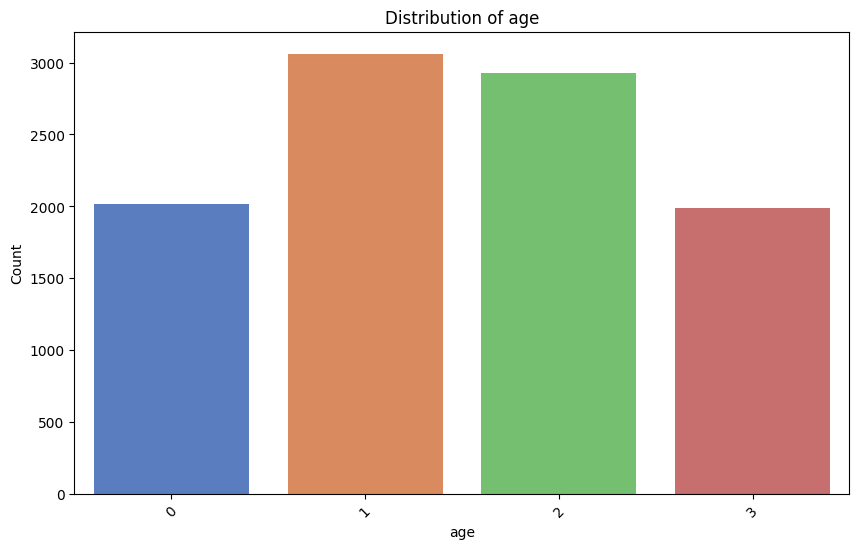

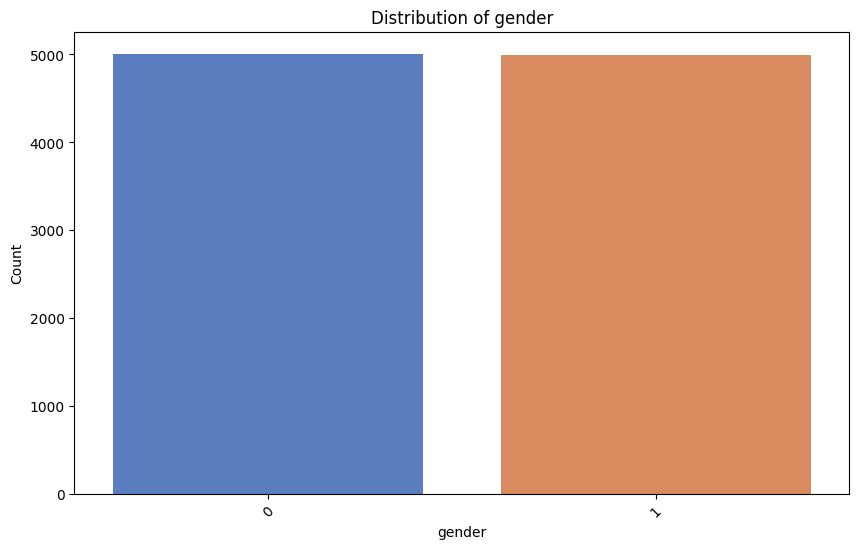

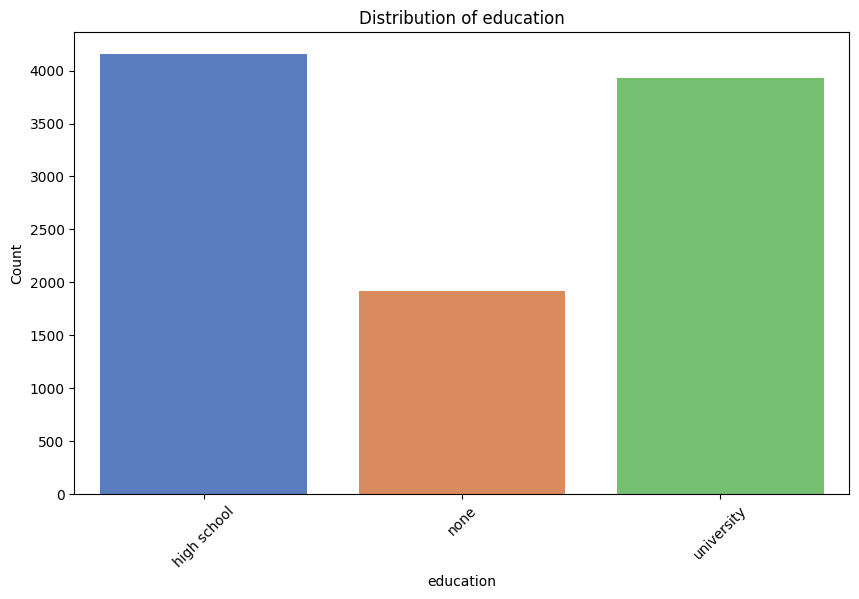

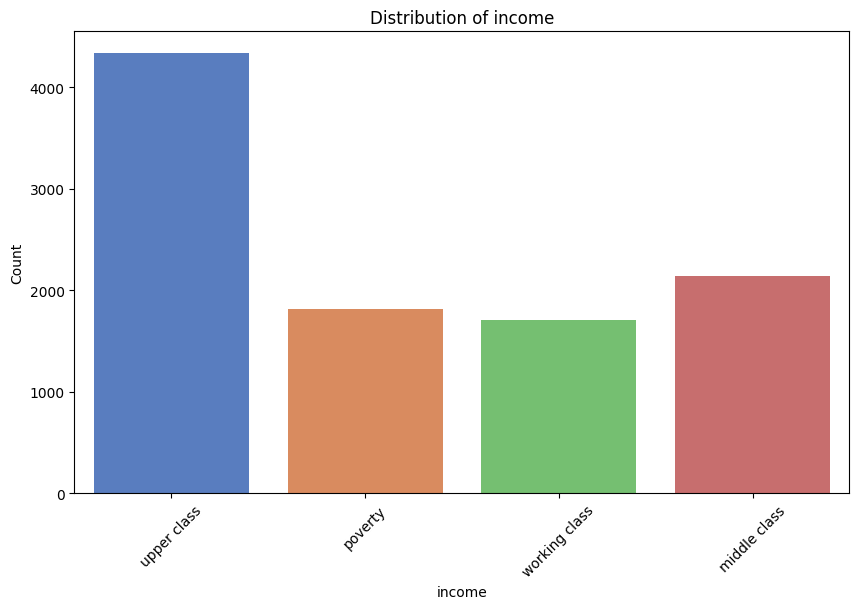

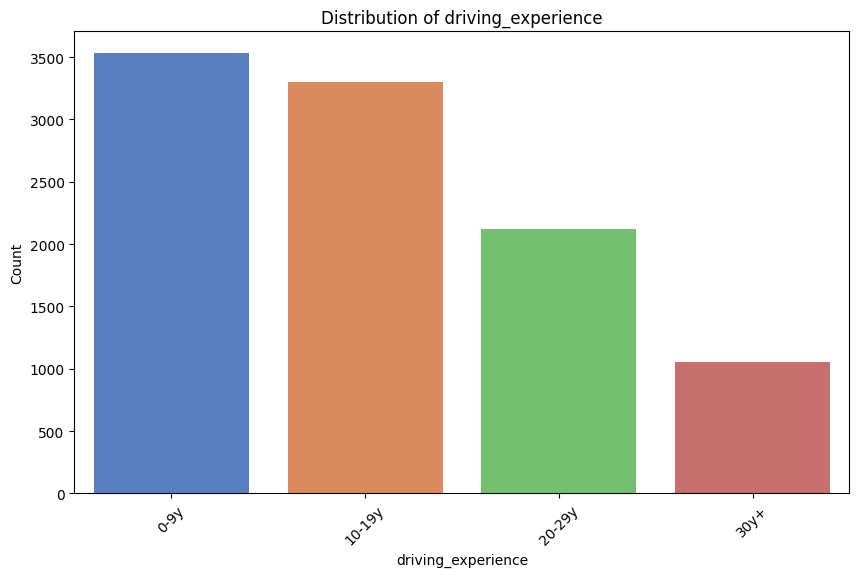

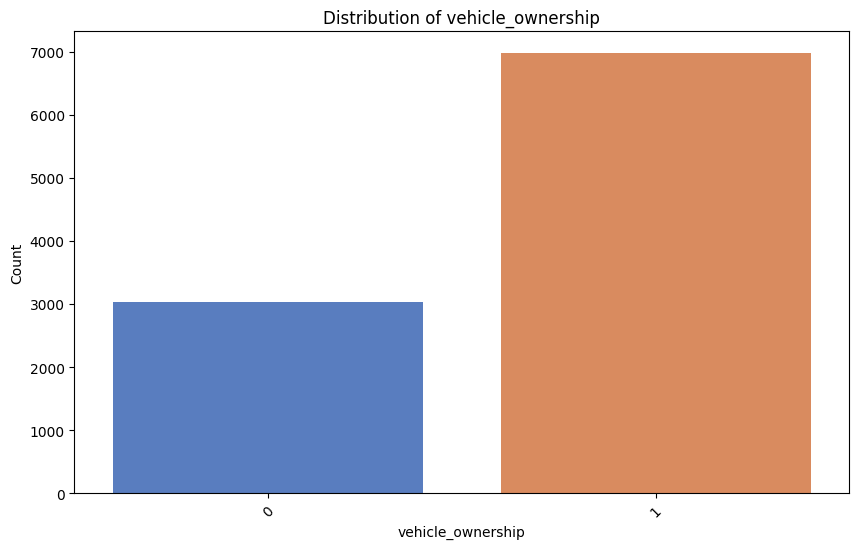

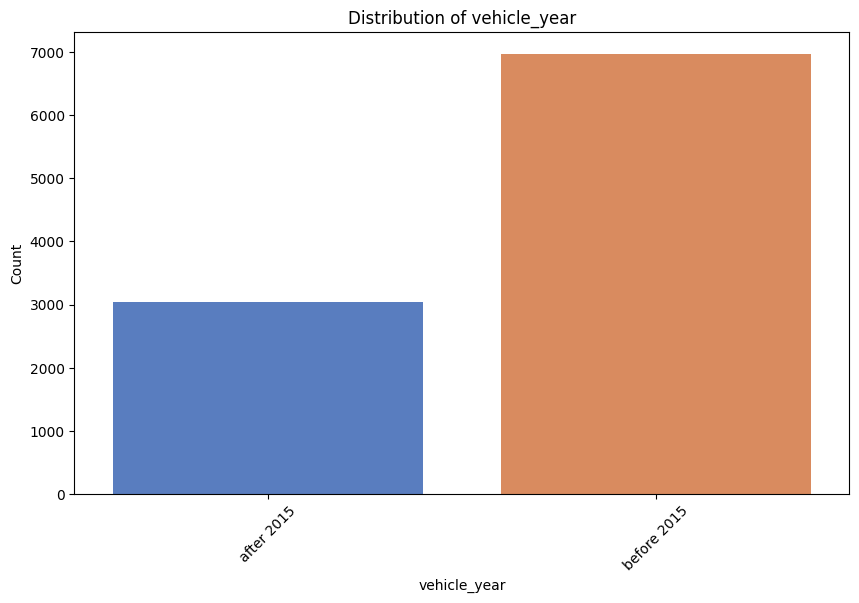

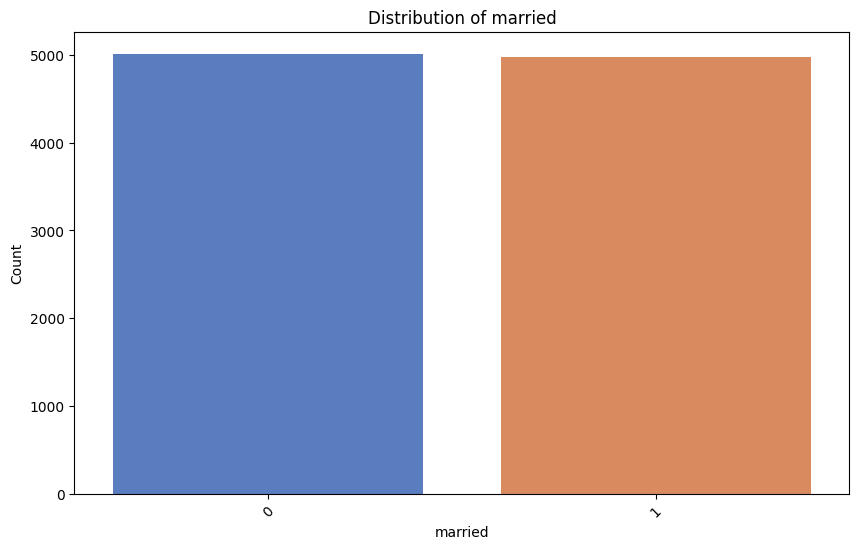

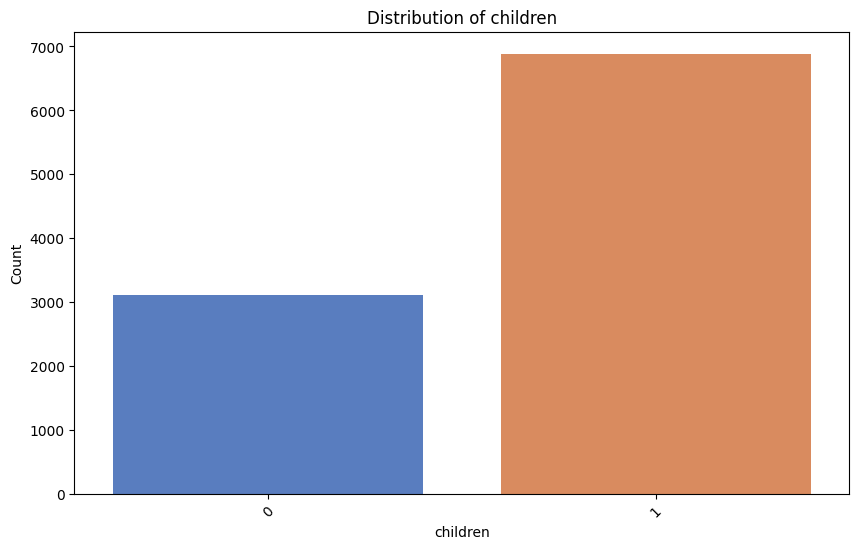

In [62]:
univariate_analyzer = UnivariateAnalyzer(CategoricalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df,'age')
univariate_analyzer.execute_analysis(df,'gender')
univariate_analyzer.execute_analysis(df,'education')
univariate_analyzer.execute_analysis(df,'income')
univariate_analyzer.execute_analysis(df,'driving_experience')
univariate_analyzer.execute_analysis(df,'vehicle_ownership')
univariate_analyzer.execute_analysis(df,'vehicle_year')
univariate_analyzer.execute_analysis(df,'married')
univariate_analyzer.execute_analysis(df,'children')




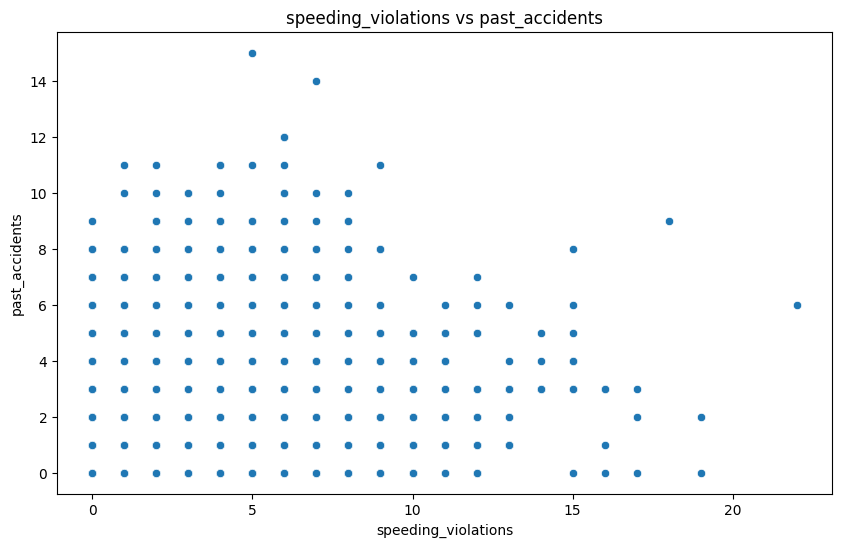

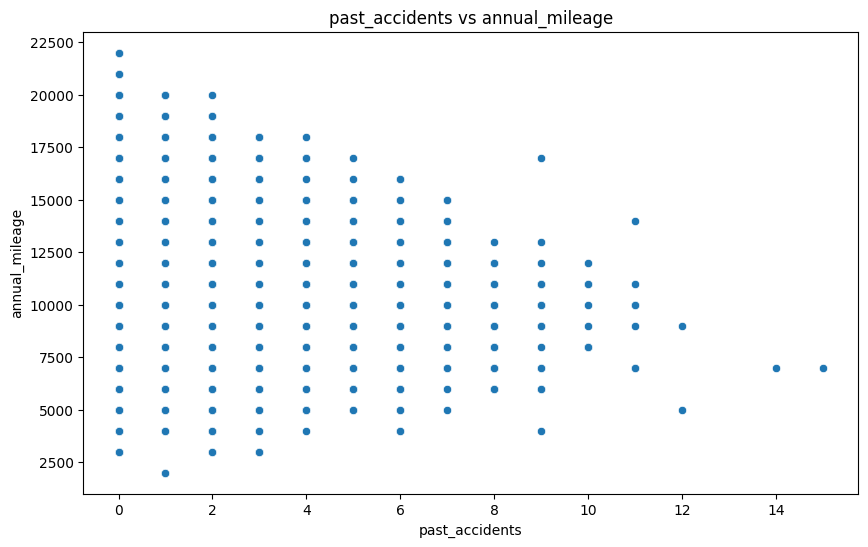

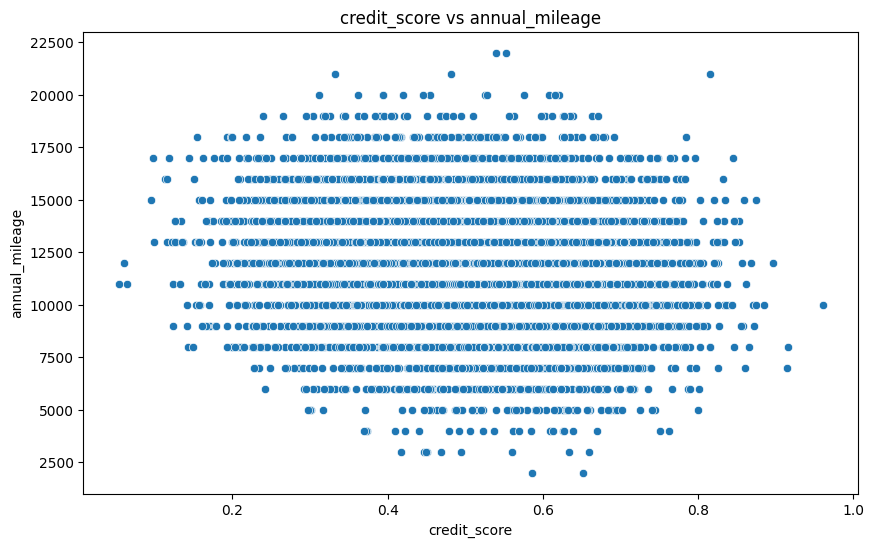

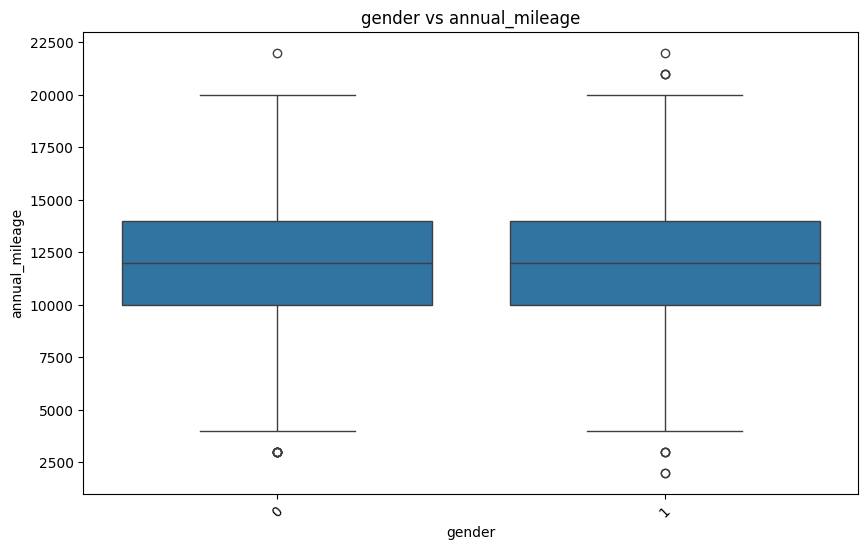

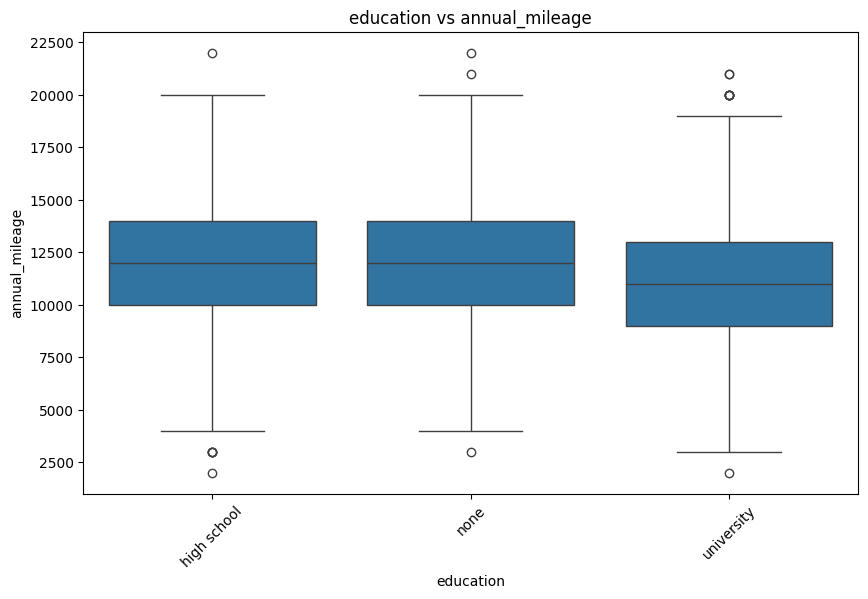

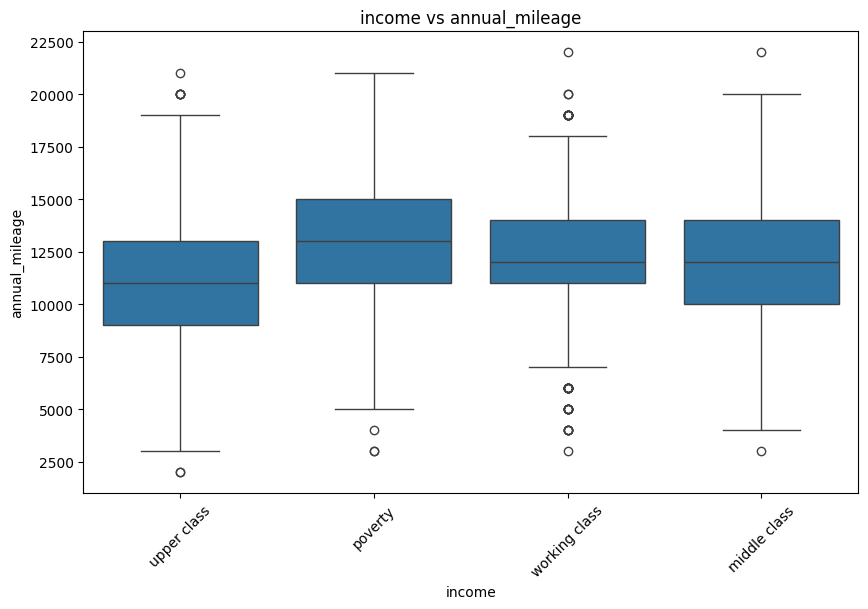

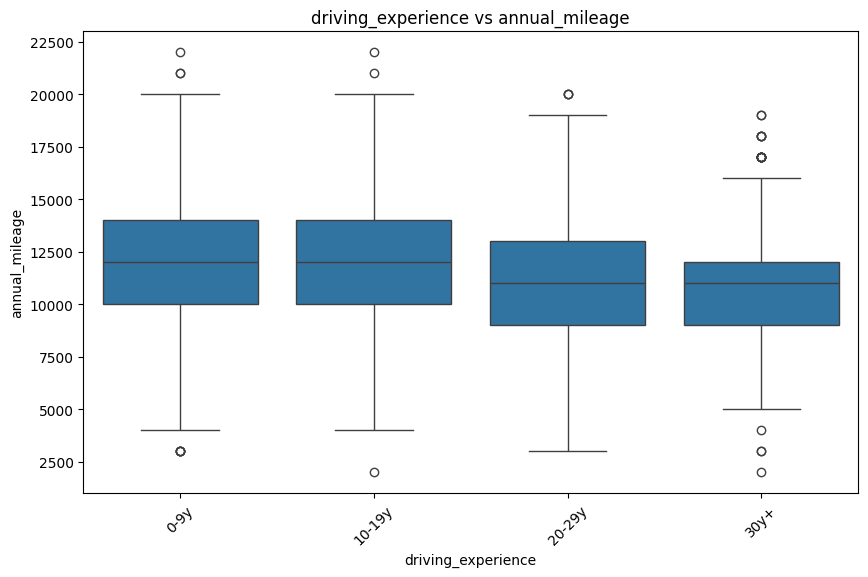

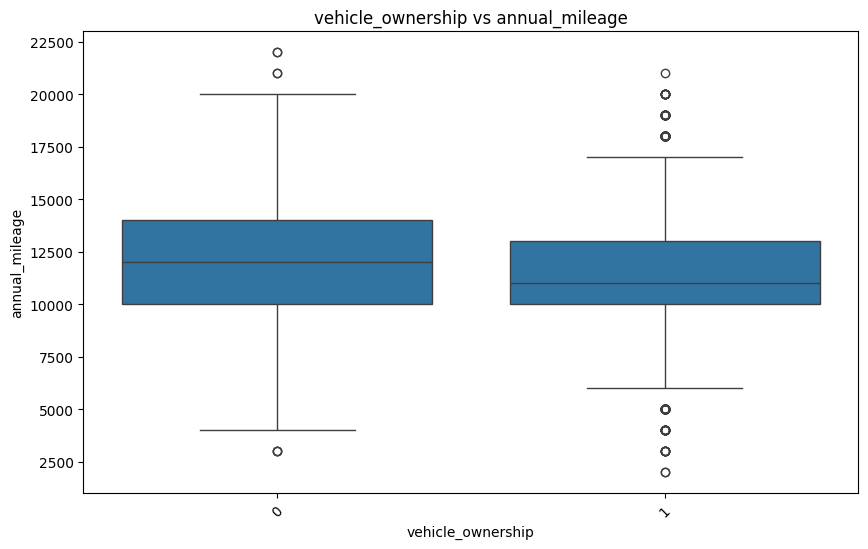

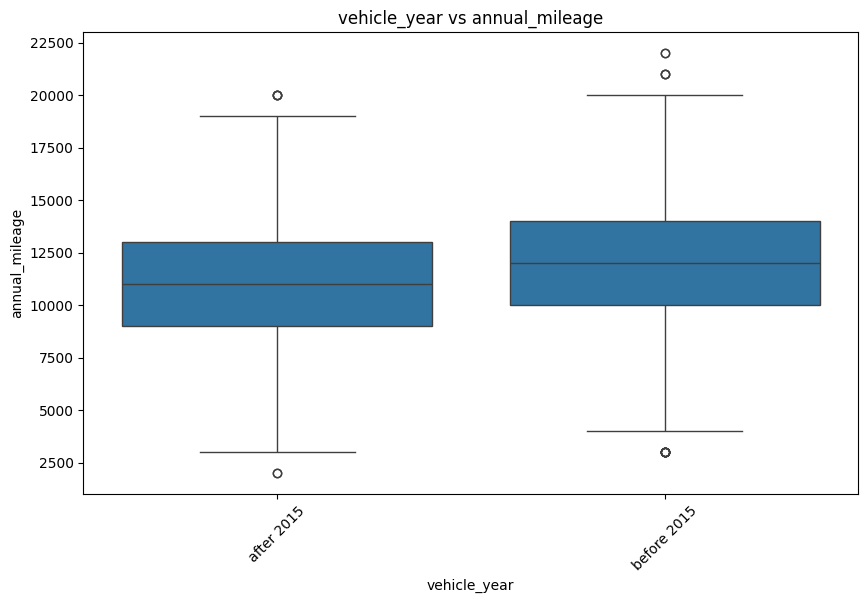

In [63]:
from analysis.bivariate_analysis import BivariateAnalyzer, NumericalVsNumericalAnalysis, CategoricalVsNumericalAnalysis

bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'speeding_violations', 'past_accidents')
bivariate_analyzer.execute_analysis(df, 'past_accidents', 'annual_mileage')
bivariate_analyzer.execute_analysis(df, 'credit_score', 'annual_mileage')




bivariate_analyzer = BivariateAnalyzer(CategoricalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'gender', 'annual_mileage')
bivariate_analyzer.execute_analysis(df, 'education', 'annual_mileage')
bivariate_analyzer.execute_analysis(df, 'income', 'annual_mileage')
bivariate_analyzer.execute_analysis(df, 'driving_experience', 'annual_mileage')
bivariate_analyzer.execute_analysis(df, 'vehicle_ownership', 'annual_mileage')
bivariate_analyzer.execute_analysis(df, 'vehicle_year', 'annual_mileage')

